In [14]:
# import the library that we'll be using
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 

In [37]:
# import the data
data = pd.read_csv('loan_data_2007_2014.csv')

c:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.



In [16]:
# Explore and analyze the data (Data Understanding)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

(466285, 75)

In [17]:
# Explore and analyze the data
data.dtypes.value_counts()

float64    46
object     22
int64       7
dtype: int64

In [18]:
# Drop null column and weird values
data['home_ownership'] = data['home_ownership'].drop(data.index[data['home_ownership'] == 'ANY'])
data.dropna(how='all', axis=1, inplace=True)

In [39]:
# Create label 
data['loan_status'] = data['loan_status'].replace(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off'], ['Medium Risk', 'Low Risk', 'High Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'High Risk', 'High Risk', 'High Risk'])

In [20]:
# Explore the data further with visualization

trace0 = go.Bar(
    x = data[data["loan_status"]== 'High Risk']["home_ownership"].value_counts().index.values,
    y = data[data["loan_status"]== 'High Risk']["home_ownership"].value_counts(),
    name='High Risk'
)

trace1 = go.Bar(
    x = data[data["loan_status"]== 'Medium Risk']["home_ownership"].value_counts().index.values,
    y = data[data["loan_status"]== 'Medium Risk']["home_ownership"].value_counts(),
    name="Medium Risk"
)

trace2 = go.Bar(
    x = data[data["loan_status"]== 'Low Risk']["home_ownership"].value_counts().index.values,
    y = data[data["loan_status"]== 'Low Risk']["home_ownership"].value_counts(),
    name="Low Risk"
)

tabels = [trace0, trace1, trace2]

layout = go.Layout(
    title='Home Ownership Distribution'
)


fig = go.Figure(data=tabels, layout=layout)

py.iplot(fig)

In [21]:

trace0 = go.Bar(
    x = data[data["loan_status"]== 'High Risk']["grade"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'High Risk']["grade"].value_counts().sort_index(),
    name='High Risk'
)

trace1 = go.Bar(
    x = data[data["loan_status"]== 'Medium Risk']["grade"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'Medium Risk']["grade"].value_counts().sort_index(),
    name="Medium Risk"
)

trace2 = go.Bar(
    x = data[data["loan_status"]== 'Low Risk']["grade"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'Low Risk']["grade"].value_counts().sort_index(),
    name="Low Risk"
)

tabels = [trace0, trace1, trace2]

layout = go.Layout(
    title='Grade Distribution'
)


fig = go.Figure(data=tabels, layout=layout)

py.iplot(fig)

In [22]:

trace0 = go.Bar(
    x = data[data["loan_status"]== 'High Risk']["verification_status"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'High Risk']["verification_status"].value_counts().sort_index(),
    name='High Risk'
)

trace1 = go.Bar(
    x = data[data["loan_status"]== 'Medium Risk']["verification_status"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'Medium Risk']["verification_status"].value_counts().sort_index(),
    name="Medium Risk"
)

trace2 = go.Bar(
    x = data[data["loan_status"]== 'Low Risk']["verification_status"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'Low Risk']["verification_status"].value_counts().sort_index(),
    name="Low Risk"
)

tabels = [trace0, trace1, trace2]

layout = go.Layout(
    title='Verification Status Distribution'
)


fig = go.Figure(data=tabels, layout=layout)

py.iplot(fig)

In [23]:

trace0 = go.Bar(
    x = data[data["loan_status"]== 'High Risk']["emp_length"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'High Risk']["emp_length"].value_counts().sort_index(),
    name='High Risk'
)

trace1 = go.Bar(
    x = data[data["loan_status"]== 'Medium Risk']["emp_length"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'Medium Risk']["emp_length"].value_counts().sort_index(),
    name="Medium Risk"
)

trace2 = go.Bar(
    x = data[data["loan_status"]== 'Low Risk']["emp_length"].value_counts().sort_index().index.values,
    y = data[data["loan_status"]== 'Low Risk']["emp_length"].value_counts().sort_index(),
    name="Low Risk"
)

tabels = [trace0, trace1, trace2]

layout = go.Layout(
    title='Employment Length Distribution'
)


fig = go.Figure(data=tabels, layout=layout)

py.iplot(fig)

In [24]:
outliers = data[data['annual_inc'] > 4000000].index
data.drop(outliers, inplace=True)

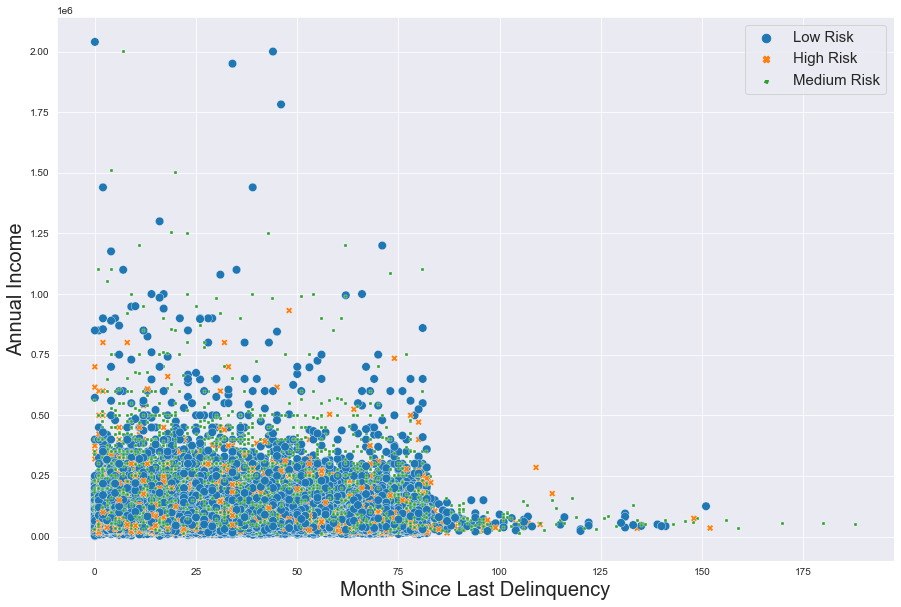

In [25]:
plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
sctr = sns.scatterplot(data=data, x="mths_since_last_delinq", y="annual_inc", hue="loan_status", size="loan_status", style="loan_status")
sctr.set_xlabel("Month Since Last Delinquency", fontsize = 20)
sctr.set_ylabel("Annual Income", fontsize = 20)
sctr.legend(fontsize= 15)

In [26]:
one_hot_encoded_data = pd.get_dummies(data[["home_ownership",'verification_status','grade','emp_length','loan_status']])
data = pd.concat([data, one_hot_encoded_data], axis=1)

data['policy_code'] = data['policy_code'].drop


In [27]:
data.corr()
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,loan_status_High Risk,loan_status_Low Risk,loan_status_Medium Risk
Unnamed: 0,1.000000,0.493961,0.503012,0.075280,0.080041,0.090812,0.033317,0.070622,0.029420,0.097819,0.063348,-0.025975,-0.023985,-0.103226,0.092793,0.102834,0.005599,0.011333,0.077374,0.286973,0.286982,-0.140655,-0.129302,-0.145494,-0.048047,-0.033899,-0.036249,-0.015140,-0.025860,0.046955,0.027064,0.019521,0.006304,0.003463,-0.003047,0.011361,-0.005568,-0.023134,0.020226,-0.022291,-0.044460,0.156708,-0.109343,-0.033093,-0.044443,0.030995,0.043077,0.020649,-0.013870,-0.006258,-0.010691,0.036843,-0.010357,-0.010515,-0.013401,-0.031207,-0.013658,0.003069,0.009964,0.008264,-0.017700,-0.053289,-0.257264,0.285802
id,0.493961,1.000000,0.997299,0.067548,0.071156,0.080064,-0.030501,0.039872,0.027682,0.130292,0.072017,-0.085187,-0.033918,-0.127125,0.099877,0.105556,0.029141,-0.011008,0.074343,0.445554,0.445650,-0.284592,-0.275464,-0.278268,-0.144484,-0.042162,-0.066163,-0.030594,-0.078281,0.056528,0.027452,0.026759,0.004007,0.007763,0.024054,0.004122,-0.010678,-0.022328,0.031768,-0.021554,-0.035918,0.172532,-0.133023,-0.012353,-0.062080,0.031309,0.033795,0.028565,-0.007267,-0.000064,-0.007672,0.036949,-0.006719,-0.005480,-0.012944,-0.043081,-0.027317,-0.003054,0.011111,0.008728,-0.004961,-0.091533,-0.372635,0.423019
member_id,0.503012,0.997299,1.000000,0.070217,0.073948,0.083202,-0.028279,0.042647,0.028461,0.129868,0.072529,-0.086387,-0.034006,-0.122525,0.099941,0.107660,0.028960,-0.010089,0.074459,0.447996,0.448090,-0.282845,-0.273347,-0.277066,-0.142028,-0.043116,-0.066359,-0.030749,-0.076850,0.056772,0.027777,0.026981,0.004087,0.008022,0.023918,0.006271,-0.011018,-0.023208,0.031647,-0.023631,-0.037715,0.173559,-0.132279,-0.013698,-0.061508,0.032449,0.033767,0.028039,-0.007804,-0.000449,-0.008587,0.039345,-0.007628,-0.006039,-0.014048,-0.043288,-0.027550,-0.002718,0.011326,0.008962,-0.006795,-0.092377,-0.378627,0.429425
loan_amnt,0.075280,0.067548,0.070217,1.000000,0.998548,0.994347,0.167188,0.949665,0.416638,0.057343,0.006838,-0.020329,-0.041340,0.011521,0.204184,-0.081135,0.331945,0.117766,0.235260,0.518712,0.518672,0.743835,0.743575,0.612767,0.715874,0.043652,0.110694,0.077338,0.304244,-0.008066,-0.066378,0.006284,-0.002859,0.333495,0.290296,0.204241,-0.001047,-0.008363,-0.030888,-0.189756,-0.356051,0.067724,0.279442,-0.048447,-0.093163,-0.008762,0.039946,0.111888,0.084882,0.064337,-0.035959,0.121214,-0.031515,-0.024399,-0.018641,-0.015999,-0.006887,0.003668,0.005281,0.011246,-0.042554,0.013185,-0.113363,0.102811
funded_amnt,0.080041,0.071156,0.073948,0.998548,1.000000,0.996125,0.167926,0.951786,0.415974,0.058697,0.007383,-0.020971,-0.041422,0.011620,0.204986,-0.080592,0.331560,0.118895,0.235134,0.521463,0.521425,0.743358,0.743436,0.612308,0.715663,0.043352,0.110341,0.077192,0.304179,-0.007821,-0.066363,0.006473,-0.002859,0.333493,0.290294,0.203965,-0.001017,-0.009110,-0.030623,-0.189600,-0.355861,0.068616,0.278389,-0.048798,-0.093164,-0.008069,0.040495,0.111058,0.084081,0.064005,-0.036110,0.121560,-0.031587,-0.024713,-0.018853,-

In [28]:
# Feature engineering
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['home_ownership'] = label_encoder.fit_transform(data['home_ownership'])
data['verification_status'] = label_encoder.fit_transform(data['verification_status'])
data['grade'] = label_encoder.fit_transform(data['grade'])
data['emp_length'] = label_encoder.fit_transform(data['emp_length'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

data[['home_ownership', 'verification_status', 'grade', 'emp_length', 'loan_status']]



,home_ownership,verification_status,grade,emp_length,loan_status
0,4,2,1,1,1
1,4,1,2,10,0
2,4,0,2,1,1
3,4,1,2,1,1
4,4,1,1,0,2
...,...,...,...,...,...
466280,0,1,2,4,2
466281,0,2,3,1,0
466282,0,2,3,7,2
466283,3,2,0,3,1


In [29]:
# select feature important features for our predictions
imp_var = data[['annual_inc', 'mths_since_last_delinq', 'loan_status', 'home_ownership', 'verification_status', 'grade', 'emp_length']]
imp_var = imp_var.fillna(0)
imp_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466277 entries, 0 to 466284
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   annual_inc              466277 non-null  float64
 1   mths_since_last_delinq  466277 non-null  float64
 2   loan_status             466277 non-null  int32  
 3   home_ownership          466277 non-null  int32  
 4   verification_status     466277 non-null  int32  
 5   grade                   466277 non-null  int32  
 6   emp_length              466277 non-null  int32  
dtypes: float64(2), int32(5)
memory usage: 19.6 MB


In [30]:
# import the library to evalute our model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# import our algorithm model 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans

In [31]:
# Creating the X and y variables
x = imp_var.drop(['loan_status'], 1).values
y = imp_var[['loan_status']].values

# Spliting X and y into train and test version
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [32]:
# Modeling
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Evaluation
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
knn_score = knn.score(x_test,y_test)
knn_report = classification_report(y_test,y_pred)

print(knn_score)
print(knn_report)
print(knn_confusion_matrix)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.44179462983615
              precision    recall  f1-score   support

           0       0.15      0.11      0.13     10471
           1       0.42      0.46      0.44     37264
           2       0.51      0.50      0.50     45521

    accuracy                           0.44     93256
   macro avg       0.36      0.36      0.36     93256
weighted avg       0.43      0.44      0.44     93256

[[ 1156  4308  5007]
 [ 2756 17304 17204]
 [ 3655 19126 22740]]


In [33]:
# Modeling
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
score = model.score(x_test,y_test)
report = classification_report(y_test,y_pred)

print(score)
print(report)
print(conf_matrix)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.4881294501158102
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10471
           1       0.00      0.00      0.00     37264
           2       0.49      1.00      0.66     45521

    accuracy                           0.49     93256
   macro avg       0.16      0.33      0.22     93256
weighted avg       0.24      0.49      0.32     93256

[[    0     0 10471]
 [    0     0 37264]
 [    0     0 45521]]


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [34]:
# Modeling
model_2 = KMeans(n_clusters=3)
model_2.fit(x_train, y_train)

y_pred = model_2.predict(x_test)

#Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
score = model_2.score(x_test,y_test)
report = classification_report(y_test,y_pred)

print(score)
print(report)
print(conf_matrix)

-70229343075355.18
              precision    recall  f1-score   support

           0       0.12      0.77      0.21     10471
           1       0.39      0.02      0.04     37264
           2       0.50      0.28      0.36     45521

    accuracy                           0.23     93256
   macro avg       0.34      0.36      0.20     93256
weighted avg       0.41      0.23      0.22     93256

[[ 8115   147  2209]
 [26085   761 10418]
 [31613  1061 12847]]
